In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pyarrow.parquet as pq

In [83]:
import glob

data = pd.concat([
    pq.read_table(f).to_pandas() for f in glob.glob('./data/*.parquet')
])

In [84]:
data.block_time = pd.to_datetime(data.block_time)

In [85]:
data.head()

,exchange,token0,token1,pair,block_number,block_time,transaction_hash,sender_address,amount0_in,amount1_in,amount0_out,amount1_out,to_address,token0_price,token1_price
0,Jediswap,ETH,USDC,0x04d0390b777b424e43839cd1e744799f3de6c176c7e3...,50758,2023-05-10 12:25:40+00:00,0x01f65ff97e4b0b7e7b367e8456200c5fff27d80eff49...,0x041fd22b238fa21cfcf5dd45a8548974d8263b3a531a...,0.022,0.000000,0.000000,40.543430,0x057a38ccf827d60e9a011fc059b7e8bbc41b047de0fa...,1842.883182,0.000543
1,Jediswap,ETH,USDC,0x04d0390b777b424e43839cd1e744799f3de6c176c7e3...,50758,2023-05-10 12:25:40+00:00,0x03c8a4041cc7f5b5f4267469eee351928f19da13f501...,0x041fd22b238fa21cfcf5dd45a8548974d8263b3a531a...,0.000,102.289135,0.055170,0.000000,0x070ff181adfd4e3d8006c3ad667bcfb92ab6b593891f...,1854.059341,0.000539
2,Jediswap,ETH,USDC,0x04d0390b777b424e43839cd1e744799f3de6c176c7e3...,50758,2023-05-10 12:25:40+00:00,0x020c95215b1096f3423e868426818ecc10a8f9887165...,0x041fd22b238fa21cfcf5dd45a8548974d8263b3a531a...,0.000,19.148023,0.010327,0.000000,0x00b35a94529684676966c91f2ed132d42abe3d80519f...,1854.195664,0.000539
3,Jediswap,ETH,USDC,0x04d0390b777b424e43839cd1e744799f3de6c176c7e3...,50758,2023-05-10 12:25:40+00:00,0x06fb305ed8121f2d62e154fca6d4b4007e8a86ce80f8...,0x041fd22b238fa21cfcf5dd45a8548974d8263b3a531a...,0.000,19.803980,0.010680,0.000000,0x075acd1473353d0a812609b6cd98a19e114aba703803...,1854.239345,0.000539
4,Jediswap,ETH,USDC,0x04d0390b777b424e43839cd1e744799f3de6c176c7e3...,50758,2023-05-10 12:25:40+00:00,0x00acd22891c1c6f02c9d105a15d2dc2881b2d708fcee...,0x041fd22b238fa21cfcf5dd45a8548974d8263b3a531a...,0.004,0.000000,0.000000,7.372577,0x00a0e2c63d8e9415cd95ec15b850f9f7ccfd88c46eec...,1843.144250,0.000543


In [103]:
eth_price = data \
  .groupby(pd.Grouper(key='block_time', freq='W')) \
  .token0_price \
  .agg(close='last', open='first', low='min', high='max')

In [127]:
melted_eth_price = eth_price.melt(value_vars=['open', 'close', 'high', 'low'], ignore_index=False)

melted_eth_price.head()

,variable,value
block_time,,
2022-11-27 00:00:00+00:00,open,2017.370000
2022-12-04 00:00:00+00:00,open,1819.500000
2022-12-11 00:00:00+00:00,open,1303.713681
2022-12-18 00:00:00+00:00,open,1237.558287
2022-12-25 00:00:00+00:00,open,1169.677882


<Axes: xlabel='block_time', ylabel='value'>

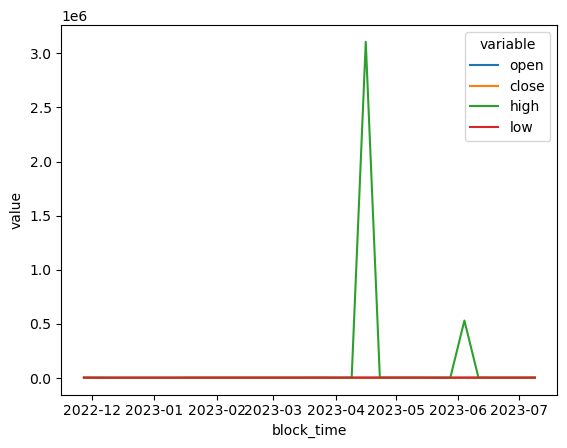

In [128]:
sns.lineplot(data=melted_eth_price.reset_index(), x='block_time', y='value', hue='variable')

In [201]:
bad_trades = data.token0_price > 5000
print('Bad trades: ', bad_trades.sum())

for _, row in data[bad_trades].iterrows():
    tx = row.transaction_hash
    print(f"https://starkscan.co/tx/{tx}")
    print(f"   Price: {row.token0_price}")
    print()

Bad trades:  9
https://starkscan.co/tx/0x05dcf4b4e58e891952358188430455470cc7d0cb071d4fc7d135a20cbdf04aa0
   Price: 529713.4832740319

https://starkscan.co/tx/0x02838a341e70cce2406854ac4b7341e32d0b34e4c334ad15b8cac8b724e38605
   Price: 1000000.0

https://starkscan.co/tx/0x007fe4de134a7c525181b2cc1ec6705ec189995de6abaa750884a66893ec908a
   Price: 1000000.0

https://starkscan.co/tx/0x0247fca86dd88a13049dfd6239f85f01ad9a2e110305b145b6c5af654c2dbe59
   Price: 1000000.0

https://starkscan.co/tx/0x068e363e74a357e6a561f51ece4d0e90825995dd80abf7961d947f3b095ab670
   Price: 1000000.0

https://starkscan.co/tx/0x06a2737c72902906dbdb880459d12f64b4aab631a771aaabfe90912fea701d97
   Price: 1000000.0

https://starkscan.co/tx/0x018a594ff23a7a347e79ced619b684ce71e6eef84bf7093acb6b4ae7e5c8f34d
   Price: 3106612.735869572

https://starkscan.co/tx/0x015116736da3c0de59245852ac383f9d51f8ce6a7f1e43fcad6af30715031a6b
   Price: 3106612.735869572

https://starkscan.co/tx/0x0127a5488963d4164765f41a9e9d7db9b647d56

In [129]:
volume_token1 = (
    data.amount0_in * data.token0_price + data.amount1_in
    + data.amount0_out * data.token0_price + data.amount1_out
)

In [130]:
data['volume_token1'] = volume_token1

In [131]:
volume_usd = data.groupby(pd.Grouper(key='block_time', freq='W')).volume_token1.agg(volume='sum')

<Axes: xlabel='block_time', ylabel='volume'>

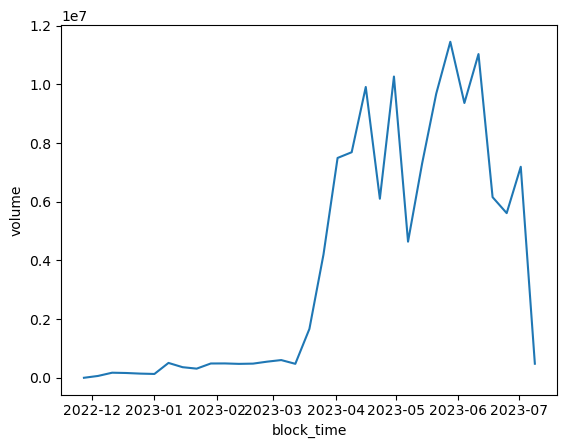

In [132]:
sns.lineplot(data=volume_usd, x=volume_usd.index, y='volume')

(0.001, 255)

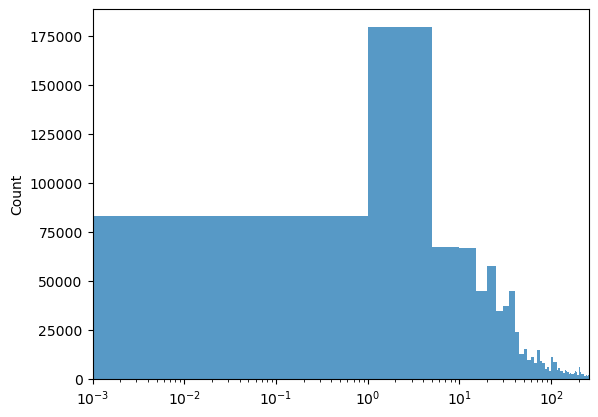

In [172]:
ax = plt.subplot()
bins = [0, 1, 5] + [10 + 5 * i for i in range(50)] + [1e10]
sns.histplot(volume_token1, bins=bins, stat='count', ax=ax)
ax.set_xscale('log')
ax.set_xlim([1e-3, bins[-2]])

In [182]:
print('0$ < x <  1$', (volume_token1 < 1).sum())
print('1$ < x < 10$', ((volume_token1 >= 1) & (volume_token1 < 10)).sum())

0$ < x <  1$ 83023
1$ < x < 10$ 246666


In [183]:
eth_price_adj = data[volume_token1 >= 1] \
  .groupby(pd.Grouper(key='block_time', freq='W')) \
  .token0_price \
  .agg(close='last', open='first', low='min', high='max')

<Axes: xlabel='block_time', ylabel='value'>

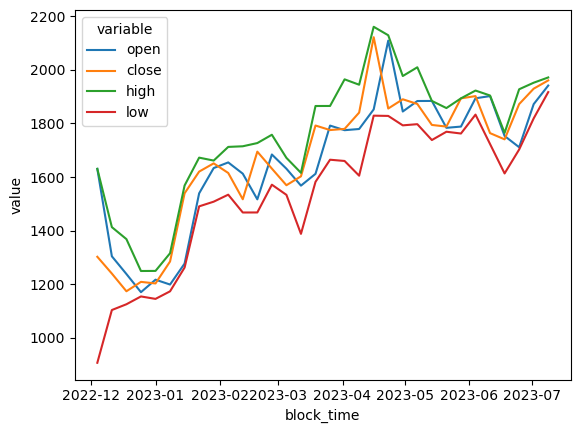

In [184]:
melted_eth_price_adj = eth_price_adj.melt(value_vars=['open', 'close', 'high', 'low'], ignore_index=False)
sns.lineplot(data=melted_eth_price_adj.reset_index(), x='block_time', y='value', hue='variable')